In [1]:
import cv2
import matplotlib.pyplot as plt
import scipy
import numpy as np
import sys

(256, 256, 3)


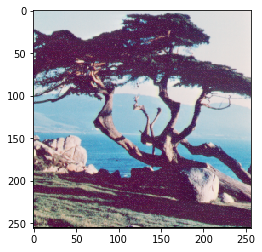

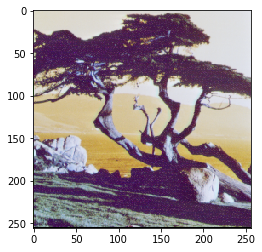

True

In [2]:
#2A
img_1 = cv2.imread('input/ps0-1-a-1.png')
RGB_img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
print(img_1.shape)


plt.imshow(RGB_img_1)
plt.show()

r,g,b = cv2.split(RGB_img_1)
BGR_img_1 = cv2.merge([b,g,r])
plt.imshow(BGR_img_1)
plt.show()

cv2.imwrite('output/ps0-2-a-1.png', BGR_img_1)


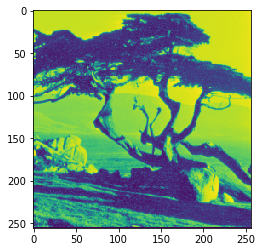

True

In [3]:
#2B
img_1_green = RGB_img_1[:,:,1]
#these two variables are used later in the code when I needed this original image. 
img_1_green_original = img_1_green
img_1_green_dup = img_1_green

plt.imshow(img_1_green)
plt.show()
cv2.imwrite('output/ps0-2-b-1.png', img_1_green)


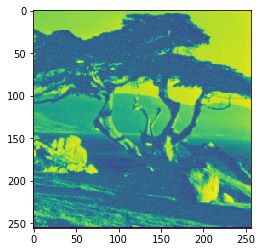

In [4]:
#2C
img_1_red = RGB_img_1[:,:,0]
plt.imshow(img_1_red)
plt.show()

In [5]:
#2D
'''
2C looks much more blurry than 2B. This distinction is very clear 
when you look at the shadow in the forefront of the tree. For that reason
I would guess that a computer vision algorithm would work better on 2B.
'''
print()

In [6]:
#funtions for quick use 
def create_monochrome_from_rgb(image,color):
    #color is 0,1,2, depending on if you want red, green, or blue
    monochrome = image[:,:,color]
    return monochrome

def load_rgb(path):
    img_1 = cv2.imread(path)
    RGB_img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
    return RGB_img_1

def plot_image(image):
    plt.imshow(image)
    plt.show()
    
def save_image(path, image):
    cv2.imwrite(path, image)


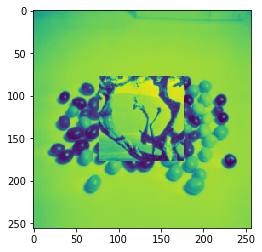

True

In [7]:
#3A
img_2 = load_rgb('input/ps0-1-a-2.png')
img_1_mono = img_1_green
img_2_mono = create_monochrome_from_rgb(img_2,1)
center_square_img_1 = img_1_mono[77:177, 77:177]
img_2_mono[77:177,77:177] = center_square_img_1
plot_image(img_2_mono)

cv2.imwrite('output/ps0-3-a-1.png', img_2_mono)

In [8]:
#4A
def get_min_max_mean_stdev(array):
    rows = array.shape[0]
    cols = array.shape[1]
    num_numbers = rows*cols
    max_array = array[0][0]
    min_array = array[0][0]
    sum_array = 0 
    
    for x in range(0, rows):
        for y in range(0, cols):
            sum_array+=array[x][y]
            if array[x][y]>max_array:
                max_array = array[x][y]
            if array[x][y]<min_array:
                min_array = array[x][y]
    mean = sum_array/num_numbers
    
    sum_sq_differences = 0
    for x in range(0, rows):
        for y in range(0, cols):
            sum_sq_differences+=((array[x][y]-mean)*(array[x][y]-mean))
    st_dev = np.sqrt(sum_sq_differences/num_numbers)
    
    return min_array, max_array, mean, st_dev

img_1_green_min, img_1_green_max, img_1_green_mean, img_1_green_stdev = get_min_max_mean_stdev(img_1_green)

#print(img_1_green_min, img_1_green_max, img_1_green_mean, img_1_green_stdev)


#first loop gets the mean, min, and max, second loop through gets the mean squared sum for variance and standard dev


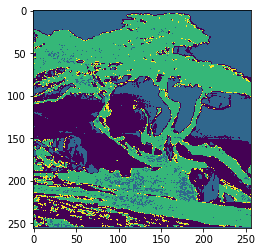

True

In [9]:
#4B
rows = img_1_green.shape[0]
cols = img_1_green.shape[1]
for x in range(0, rows):
    for y in range(0, cols):
        img_1_green[x][y] = img_1_green[x][y] - img_1_green_mean
        img_1_green[x][y] = img_1_green[x][y] / img_1_green_stdev
        img_1_green[x][y] = img_1_green[x][y] * 10
        img_1_green[x][y] = img_1_green[x][y] + img_1_green_mean

plot_image(img_1_green)
cv2.imwrite('output/ps0-4-b-1.png', img_1_green)


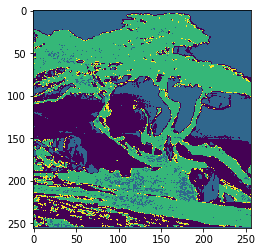

'\nfor x in range(0, rows):\n    for y in range(0, cols):\n        img_1_green[x][y] = img_1_green[x][y] - 2\n\nplot_image(img_1_green)\n'

In [10]:
#4C

img1_green = RGB_img_1[:,:,1].copy()
rows,cols = img1_green.shape
M = np.float32([[1,0,50],[0,1,0]])
dst = cv2.warpAffine(img1_green,M,(cols,rows))

plot_image(img1_green)


#curious about shifting the already messed with image 1 green 
#not different for some reason???? 
'''
for x in range(0, rows):
    for y in range(0, cols):
        img_1_green[x][y] = img_1_green[x][y] - 2

plot_image(img_1_green)
'''

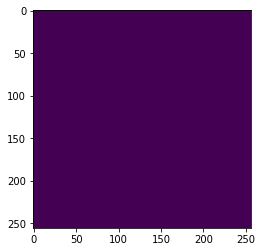

'\nThey are all the lowest possible value because negative values get truncated to zero \n'

In [11]:
#4D

img_1_green_difference = img_1_green_original - img_1_green
plot_image(img_1_green_difference)
cv2.imwrite('output/ps0-4-d-1.png', img_1_green_difference)


'''
They are all the lowest possible value because negative values get truncated to zero 
'''

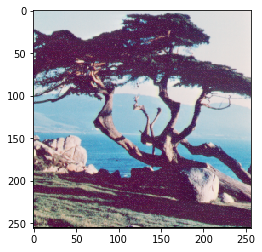

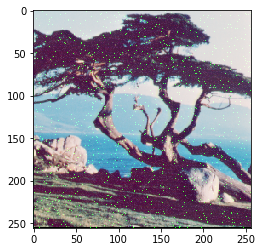

In [12]:
#5A
img_1 = cv2.imread('input/ps0-1-a-1.png')
RGB_img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

noise = np.random.normal(0,0.5,(RGB_img_1.shape[0], RGB_img_1.shape[1]))
noise = noise.astype('uint8') 

green_noise = RGB_img_1.copy()
green_noise[:,:,1] = cv2.add(green_noise[:,:,1], noise)

#print(noisy_img.dtype)
#print(noisy_img)
plot_image(RGB_img_1)
plot_image(green_noise)



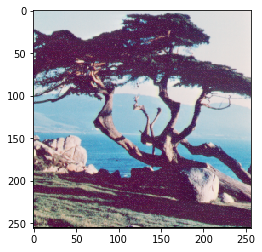

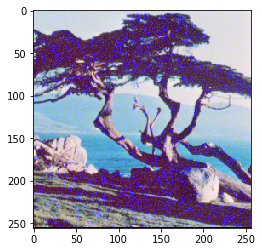

In [13]:
#5B
img_1 = cv2.imread('input/ps0-1-a-1.png')
RGB_img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

noise = np.random.normal(0,1,(RGB_img_1.shape[0], RGB_img_1.shape[1]))
noise = noise.astype('uint8') 

blue_noise = RGB_img_1.copy()
blue_noise[:,:,2] = cv2.add(blue_noise[:,:,2], noise)

#print(noisy_img.dtype)
#print(noisy_img)
plot_image(RGB_img_1)
plot_image(blue_noise)

In [14]:
#5C
#The noise added to the blue channel looks better because the blue fits in better with the background of the picture
#They both begin to be noticeable at a sigma value of 1
